## Задание 1

Студенты проходили тестирование по финансовой грамотности, результаты измерялись до прохождения курса по управлению финансами и после. В выборке представлены их результаты.

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from arch.bootstrap import IIDBootstrap
from statsmodels.stats.descriptivestats import sign_test
from math import sqrt
import scipy.stats as st
from permute.core import one_sample

In [2]:
def read_data(filename):
    with open(filename, 'r') as f:
        all_data = f.read().splitlines()
        columns = all_data[0].split()
        data = {'Student': [], 'Before': [], 'After': []}
        for string in all_data[1:]:
            row = string.split()
            if row:
                if data['Student'].count(row[1]) == 0:
                    data['Student'].append(row[1])
                data[row[0]].append(int(row[2]))
        data['Student'] = list(data['Student'])
    return pd.DataFrame(data)

In [3]:
data = read_data('students.txt')

In [4]:
data.head(data.shape[0])

,Student,Before,After
0,a,65,77
1,b,75,98
2,c,86,92
3,d,69,77
4,e,60,65
5,f,81,77
6,g,88,100
7,h,53,73
8,i,75,93
9,j,73,75


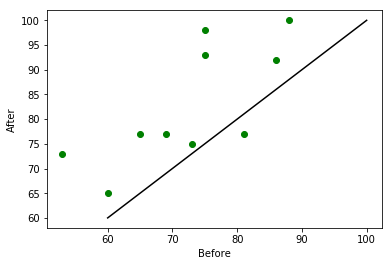

In [5]:
plt.scatter(data['Before'].values, data['After'].values, c = 'g')
plt.xlabel('Before')
plt.ylabel('After')
ident = [60.0, 100.0]
plt.plot(ident, ident, color='black')

### Гипотезы:

$H_0$: результаты не изменились.

$H_1^1$: результаты изменились (двусторонняя альтернатива).

$H_1^2$: среднее значение увеличилось (односторонняя альтернатива).

In [6]:
delta = data['Before'].values - data['After'].values
delta

array([-12, -23,  -6,  -8,  -5,   4, -12, -20, -18,  -2])

### QQ-plot (проверяем нормальность):

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-23, -20, -18, -12, -12,  -8,  -6,  -5,  -2,   4])),
 (9.151011470199114, -10.2, 0.9912380905834036))

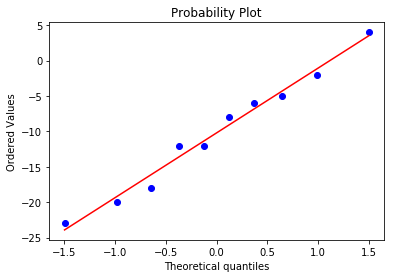

In [7]:
st.probplot(delta, plot=plt)

In [8]:
st.shapiro(delta)

(0.9754936099052429, 0.9365940690040588)

### Критерий знаков:

In [9]:
sign_test(delta)

(-4.0, 0.021484374999999997)

### Wilkoxon:

In [10]:
st.wilcoxon(delta)

WilcoxonResult(statistic=2.0, pvalue=0.00929822320829811)

### Перестановки:

In [11]:
one_sample(data['Before'], data['After'],  alternative='two-sided')

(0.0040800000000000836, -10.2)

In [12]:
one_sample(data['Before'], data['After'],  alternative='less')

(0.0020200000000000218, -10.2)

In [13]:
one_sample(data['Before'], data['After'], stat = 't', reps = 10000, alternative='two-sided')

(0.0027999999999999137, -3.808374649652914)

In [14]:
one_sample(data['Before'], data['After'], stat = 't', reps = 10000, alternative='less')

(0.0019000000000000128, -3.808374649652914)

### Доверительный интервал для среднего разностей:

In [15]:
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, size = 0.95, method='bca')

array([[-15.2],
       [ -5.6]])

In [16]:
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, size = 0.95, method='basic')

array([[-14.9025],
       [ -5.2   ]])

### t-test для двух выборок:

In [17]:
# two-tailed p-value
st.ttest_rel(data['Before'], data['After'])

Ttest_relResult(statistic=-3.808374649652914, pvalue=0.004163495155629837)

### Вывод:

Гипотезу $H_0$ нужно отвергнуть при любой из рассмотренных альтернатив.

### Cohen's d:

In [18]:
def s(data_1, data_2):
    n1 = len(data_1)
    n2 = len(data_2)
    return sqrt((np.std(data_1, ddof=1) * (n1-1) + np.std(data_2, ddof=1) * (n2-1)) / \
                 (n1 + n2 - 2))

def cohens_d(data_1, data_2):
    return (np.mean(data_1) - np.mean(data_2)) / s(data_1, data_2)

In [19]:
cohens_d(data['After'].values, data['Before'].values)

3.0019022783784943

Эффект получается очень большой.